# Bike Dataset Findings

## by Noureddine Ettayyeby

## Investigation Overview

<p> In this presentation I will show the relationships between three variables length of the trip, type of user and start time of the trip, I will be answering questions like how these three variables interact with each other, how long is the average trips for each type of users, when are most of the trips taken and how they relate to user type and length?</p>

## Dataset Overview

The data set is a data set from https://www.lyft.com/bikes/bay-wheels/system-data I download the 2019 dataset and wrangle it to get a data set with 13 columns and around half a million rows, with features like duration_sec(trip duration in seconds), start station name, start time(when the trip start), start station latitude... 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('bike_2019_data.csv')

In [3]:
#reduece the data set to 15 station.
bike_data.start_time = pd.to_datetime(bike_data.start_time)
start_station = bike_data.start_station_name.value_counts()[:15].index
bike_data = bike_data[bike_data.start_station_name.isin(start_station)]
bike_data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# convert start time and end time to timestamp
bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)

In [5]:
# A function to add a column to the data frame specifiyng the period of the day the trip was started 
def day_period(data):
    if data + 1 >= 6 and data + 1 < 12:
        return 'Morning'
    elif data + 1 >= 12 and data + 1 < 14:
        return 'Mid-day'
    elif data + 1 >= 14 and data + 1 < 18:
        return 'Afternoon'
    elif data + 1 >= 18 and data + 1 < 22:
        return 'Evening'
    else:
        return 'Night'

In [6]:
# Create three new columns
bike_data['day_period'] = bike_data.start_time.dt.hour.apply(day_period)
bike_data['month'] = bike_data.start_time.dt.strftime('%b')
bike_data['day'] = bike_data.start_time.dt.day_name()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of user types

In the belw plot I see that most of user are subscribers around 400K compared to just about 100k

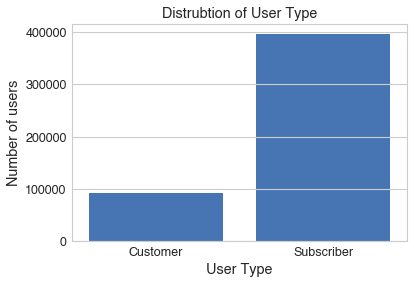

In [7]:
# user's type 
base_color = sb.color_palette()[0]
sb.countplot(bike_data.user_type, color=base_color);
plt.xlabel('User Type')
plt.ylabel('Number of users')
plt.title('Distrubtion of User Type');

## Distribution of trip length(s)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

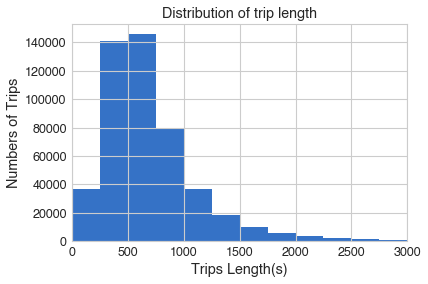

In [21]:
bins_edge = np.arange(0, bike_data.duration_sec.max() + 250, 250)
plt.hist(bike_data.duration_sec, bins=bins_edge);
plt.xlim(0, 3000);
plt.xlabel('Trips Length(s)');
plt.ylabel('Numbers of Trips');
plt.title('Distribution of trip length');

## Distribution of the start time for the week

Most of the trips are taken on the weekdays and there is not a big difference between weekdays, but on the weekends, there is a huge drop in the number of trips compared to weekdays.

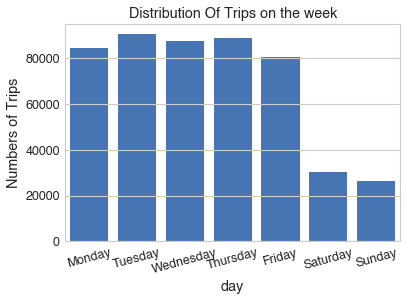

In [9]:
# plot the distrbtion of the start time through out the week 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=bike_data, x='day', order=days, color=base_color);
plt.ylabel('Numbers of Trips')
plt.title('Distribution Of Trips on the week')
plt.xticks(rotation=15);

## Trip length and user type

The plot below shows that customer tends to take a longer trip than subscribers

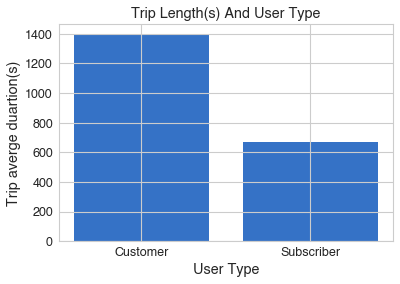

In [10]:
plt.bar(bike_data.groupby('user_type')['duration_sec'].mean().index, bike_data.groupby('user_type')['duration_sec'].mean());
plt.ylabel('Trip averge duartion(s)');
plt.xlabel('User Type');
plt.title('Trip Length(s) And User Type');

## Trip length and day period

People who take trips in the afternoon and Midday periods take longer trips than people who take trips in any other periods of the day, But the shortest trips are taken in the morning.

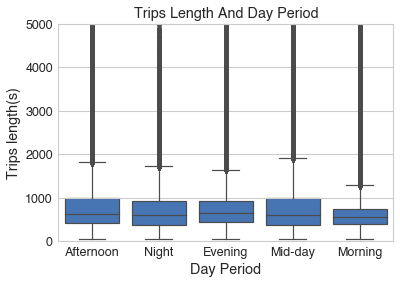

In [11]:
sb.boxplot(data=bike_data, x='day_period', y='duration_sec', color=base_color);
plt.ylim(0, 5000);
plt.ylabel('Trips length(s)')
plt.xlabel('Day Period')
plt.title('Trips Length And Day Period');

## Trip length and month

The plot below shows that the longest trips are taken in June and September and the shortest trips are taken in September.

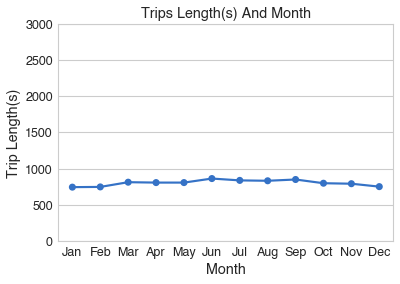

In [17]:
sb.pointplot(data=bike_data, x='month', y='duration_sec', color=base_color);
plt.ylim(0, 3000);
plt.xlabel('Month')
plt.ylabel('Trip Length(s)')
plt.title('Trips Length(s) And Month');

## Trip start month and user type

In most months the number of subscribers is a lot bigger than the number of customers but in December the number of customers exceeds the number of subscribers.

Text(0.5, 1.0, 'User Type And Month')

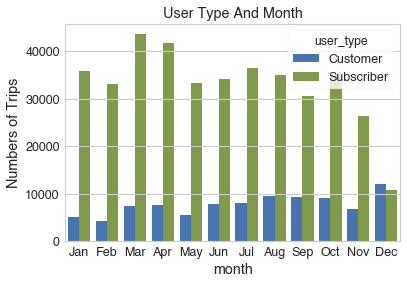

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.countplot(data=bike_data, x='month', hue='user_type', order=months);
plt.ylabel('Numbers of Trips')
plt.title('User Type And Month');

## day period, trip length and user type

Customers take longer trips in The midday and afternoon periods than any other periods of the day. As for subscribers, there is not much variation but they tend to take longer trips in the midday and the evenings periods.

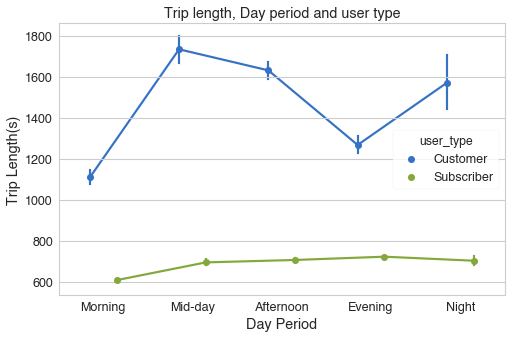

In [14]:
plt.figure(figsize=(8, 5))
period_order = ['Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night']
sb.pointplot(data=bike_data, x='day_period', y='duration_sec', hue='user_type', \
             dodge=.3, order=period_order, linestyles='-');
plt.ylabel('Trip Length(s)')
plt.xlabel('Day Period')
plt.title('Trip length, Day period And User Type');

## day , trip length and user type

Customers and subscribers alike tend to take longer trips at the weekends than on weekdays.

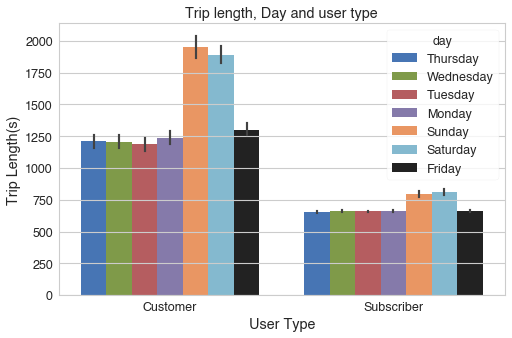

In [15]:
plt.figure(figsize=(8, 5))
sb.barplot(data=bike_data, x='user_type', y='duration_sec', hue='day');
plt.ylabel('Trip Length(s)')
plt.xlabel('User Type')
plt.title('Trip length, Day And User Type');

## day , trip length and user type

Subscribers take longer trips iJune and September and shorter trips in Jnauary but mostly there is not much veriation in the trips length Throughout the year. On the other hand there is a lot a veriation for customers, since they tend to take longer trips in the period between Janaury and July, but after that there is a huge drop until the end of year.

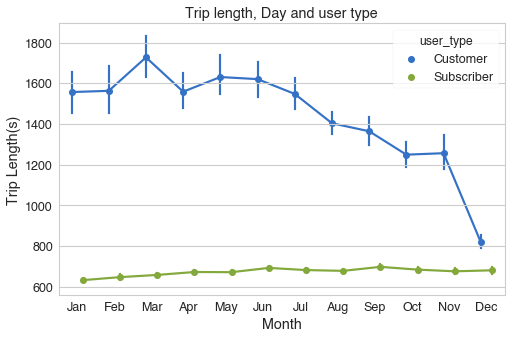

In [16]:
plt.figure(figsize=(8, 5))
sb.pointplot(data=bike_data, x='month', y='duration_sec', hue='user_type', \
             dodge=.3, order=months, linestyles='-');
plt.ylabel('Trip Length(s)')
plt.xlabel('Month')
plt.title('Trip length, Day and user type');

Conclusion 

The length of the trips depends on the type of user and the time of trip start, Customers take longer trips then customers, weekends have longer trips than weekdays, and usually, in springs and summer, people take longer trips.

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 529355 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
